## Load the Boston housing dataset

In [8]:
from sklearn import datasets
import pandas as pd


There are multiple datasets within this package. Some of the Toy Datasets are:

In [9]:
#load_boston()         # Load and return the boston house-prices dataset (regression).
#load_iris()           # Load and return the iris dataset (classification).
#load_diabetes()       # Load and return the diabetes dataset (regression).
#load_digits([n_class])# Load and return the digits dataset (classification).
#load_linnerud()       # Load and return the linnerud dataset (multivariate regression).

In [10]:
boston_data = datasets.load_boston()

Load the data into a Pandas DataFrame df by running the following:

In [11]:
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

To distinguish the target from our features, it can be helpful to store it at the front of our DataFrame. Move the target variable to the front of df by running the cell with the following:

In [12]:

df_boston['target'] = pd.Series(boston_data.target)



We can do df.head() or df.tail() to see a glimpse of the data and len(df) to make sure the number of samples is what we expect. Run the next few cells to see the head, tail, and length of df

In [13]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Each row is labeled with an index value, as seen in bold on the left side of the table.By default, these are a set of integers starting at 0 and incrementing by one for each ro

In [14]:
df_boston.dtypes #show the datatype contained within each column.

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [15]:
# Identify and NaNs
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

## Data Exploration


Since this is an entirely new dataset that we've never seen before, the first goal here is to understand the data. We've already seen the textual description of the data, which is important for qualitative understanding. We'll now compute a quantitative description.

Explore the Boston housing dataset

In [16]:
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


This computes various properties including the mean, standard deviation, minimum, and maximum for each column. This table gives a high-level idea of how everything is distributed. Note that we have taken the transform of the result by adding a .T to the output; this swaps the rows and column

To simplify the analysis, the final thing we'll do before exploration is remove some of the columns

In [23]:
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
     del df_bosto[col]

In [24]:
df_boston.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT,target
0,0.00632,2.31,0.0,6.575,65.2,4.0900,296.0,4.98,24.0
1,0.02731,7.07,0.0,6.421,78.9,4.9671,242.0,9.14,21.6
2,0.02729,7.07,0.0,7.185,61.1,4.9671,242.0,4.03,34.7
3,0.03237,2.18,0.0,6.998,45.8,6.0622,222.0,2.94,33.4
4,0.06905,2.18,0.0,7.147,54.2,6.0622,222.0,5.33,36.2


Going forward with the analysis, we will specify a set of columns to focus on.

In [27]:
cols = ['RM', 'AGE', 'TAX', 'LSTAT','target'] 

In [28]:
df_boston[cols].head()

,RM,AGE,TAX,LSTAT,target
0,6.575,65.2,296.0,4.98,24.0
1,6.421,78.9,242.0,9.14,21.6
2,7.185,61.1,242.0,4.03,34.7
3,6.998,45.8,222.0,2.94,33.4
4,7.147,54.2,222.0,5.33,36.2


From the dataset documentation:

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

TAX full-value property-tax rate per 10,000

LSTAT percet lower status of the population

Target Median value of owner-occupied homes in 1000's


In [31]:
df_boston[cols].corr()

,RM,AGE,TAX,LSTAT,target
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
target,0.695360,-0.376955,-0.468536,-0.737663,1.000000


This resulting table shows the correlation score between each set of values. Large positive scores indicate a strong positive  correlation.As expected, we see maximum values of 1 on the diagonal.


Pearson coefficient is defined as the co-variance between two variables,divided by the product of their standard deviations:
rho_x,y=cov(x,y)/sigma_x,sigma_y

The co-variance, in turn, is defined as follows:

cov(x,y)=1/n sum_{i=0}^n(x_i-\overline x) (y_i= \overline y)
Here, n is the number of samples, xi and yi are the individual samples being summed over, and \overline x ,  \overline y , are the means of each set.

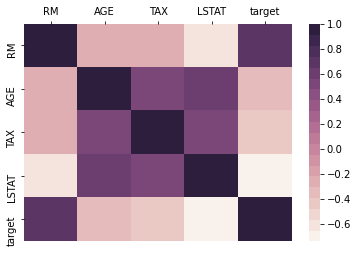

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

ax = sns.heatmap(df_boston[cols].corr(),
cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top() # move labels to the top
plt.savefig('boston-housing-corr.png',
bbox_inches='tight', dpi=300)

We call sns.heatmap and pass the pairwise correlation matrix as input. We use a custom color palette here to override the Seaborn default. The function returns a matplotlib.axes object which is referenced by the variable ax

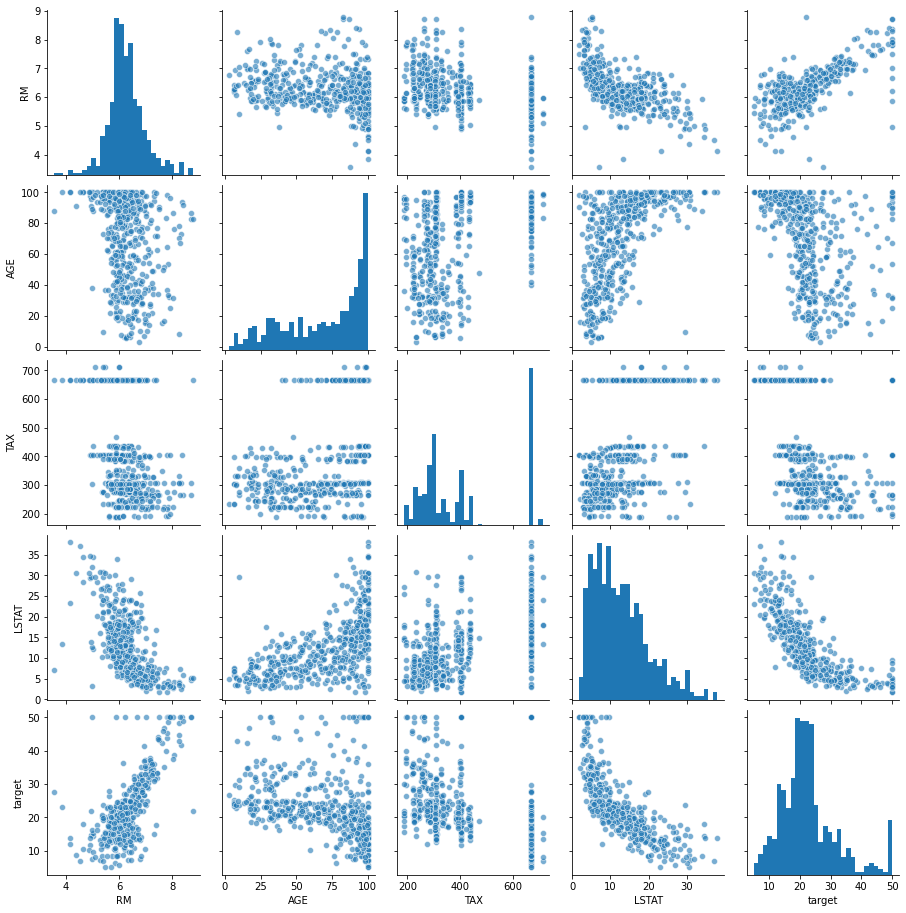

In [37]:
sns.pairplot(df_boston[cols],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30}) 

Having previously used a heatmap to visualize a simple overview of the correlations, this plot allows us to see the relationships in far more detail